# Social Buzz Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Data Cleaning

Wrangling Reactions

In [2]:
R_df=pd.read_csv('reactions.csv')

In [3]:
R_df

Unnamed: 0                            Content ID  \
0               0  97522e57-d9ab-4bd6-97bf-c24d952602d2   
1               1  97522e57-d9ab-4bd6-97bf-c24d952602d2   
2               2  97522e57-d9ab-4bd6-97bf-c24d952602d2   
3               3  97522e57-d9ab-4bd6-97bf-c24d952602d2   
4               4  97522e57-d9ab-4bd6-97bf-c24d952602d2   
...           ...                                   ...   
25548       25548  75d6b589-7fae-4a6d-b0d0-752845150e56   
25549       25549  75d6b589-7fae-4a6d-b0d0-752845150e56   
25550       25550  75d6b589-7fae-4a6d-b0d0-752845150e56   
25551       25551  75d6b589-7fae-4a6d-b0d0-752845150e56   
25552       25552  75d6b589-7fae-4a6d-b0d0-752845150e56   

                                    User ID        Type             Datetime  
0                                       NaN         NaN  2021-04-22 15:17:15  
1      5d454588-283d-459d-915d-c48a2cb4c27f     disgust  2020-11-07 09:43:50  
2      92b87fa5-f271-43e0-af66-84fac21052e6     dislike  2021-06-17 12:22:51  
3      163daa38-8b77-48c9-9af6-37a6c1447ac2      scared  2021-04-18 05:13:58  
4      34e8add9-0206-47fd-a501-037b994650a2     disgust  2021-01-06 19:13:01  
...                                     ...         ...                  ...  
25548  80c9ce48-46f9-4f5e-b3ca-3b698fc2e949     dislike  2020-06-27 09:46:48  
25549  2bd9c167-e06c-47c1-a978-3403d6724606   intrigued  2021-02-16 17:17:02  
25550                                   NaN  interested  2020-09-12 03:54:58  
25551  5ffd8b51-164e-47e2-885e-8b8c46eb63ed     worried  2020-11-04 20:08:31  
25552  4edc3d1a-a7d9-4db6-89c3-f784d9954172     cherish  2021-01-04 04:55:11  

[25553 rows x 5 columns]

In [4]:
R_df=R_df.drop(columns=['Unnamed: 0', 'User ID'])

In [5]:
R_df= R_df.dropna()

In [6]:
R_df

Content ID        Type             Datetime
1      97522e57-d9ab-4bd6-97bf-c24d952602d2     disgust  2020-11-07 09:43:50
2      97522e57-d9ab-4bd6-97bf-c24d952602d2     dislike  2021-06-17 12:22:51
3      97522e57-d9ab-4bd6-97bf-c24d952602d2      scared  2021-04-18 05:13:58
4      97522e57-d9ab-4bd6-97bf-c24d952602d2     disgust  2021-01-06 19:13:01
5      97522e57-d9ab-4bd6-97bf-c24d952602d2  interested  2020-08-23 12:25:58
...                                     ...         ...                  ...
25548  75d6b589-7fae-4a6d-b0d0-752845150e56     dislike  2020-06-27 09:46:48
25549  75d6b589-7fae-4a6d-b0d0-752845150e56   intrigued  2021-02-16 17:17:02
25550  75d6b589-7fae-4a6d-b0d0-752845150e56  interested  2020-09-12 03:54:58
25551  75d6b589-7fae-4a6d-b0d0-752845150e56     worried  2020-11-04 20:08:31
25552  75d6b589-7fae-4a6d-b0d0-752845150e56     cherish  2021-01-04 04:55:11

[24573 rows x 3 columns]

In [7]:
R_df['Type'].unique()

array(['disgust', 'dislike', 'scared', 'interested', 'peeking', 'cherish',
       'hate', 'love', 'indifferent', 'super love', 'intrigued',
       'worried', 'like', 'heart', 'want', 'adore'], dtype=object)

In [8]:
R_df['Type']=R_df['Type'].replace({'disgust':'Disgust', 'dislike':'Dislike', 'scared':'Scared',
                                  'interested':'Interested', 'peeking':'Peeking','cherish':'Cherish','hate':'Hate',
                                  'love':'Love', 'indifferent':'Indifferent', 'super love':'super Love', 'intrigued':'Intrigued',
                                  'worried':'Worried', 'like':'Like', 'heart':'Heart', 'want':'Want', 'adore':'Adore'})

In [9]:
R_df['Datetime'] = pd.to_datetime(R_df['Datetime']).dt.strftime('%Y-%m-%d, %H-%M-%S')

In [10]:
R_df = R_df.rename(columns={'Type': 'Reaction_Type'})

In [11]:
R_df

Content ID Reaction_Type  \
1      97522e57-d9ab-4bd6-97bf-c24d952602d2       Disgust   
2      97522e57-d9ab-4bd6-97bf-c24d952602d2       Dislike   
3      97522e57-d9ab-4bd6-97bf-c24d952602d2        Scared   
4      97522e57-d9ab-4bd6-97bf-c24d952602d2       Disgust   
5      97522e57-d9ab-4bd6-97bf-c24d952602d2    Interested   
...                                     ...           ...   
25548  75d6b589-7fae-4a6d-b0d0-752845150e56       Dislike   
25549  75d6b589-7fae-4a6d-b0d0-752845150e56     Intrigued   
25550  75d6b589-7fae-4a6d-b0d0-752845150e56    Interested   
25551  75d6b589-7fae-4a6d-b0d0-752845150e56       Worried   
25552  75d6b589-7fae-4a6d-b0d0-752845150e56       Cherish   

                   Datetime  
1      2020-11-07, 09-43-50  
2      2021-06-17, 12-22-51  
3      2021-04-18, 05-13-58  
4      2021-01-06, 19-13-01  
5      2020-08-23, 12-25-58  
...                     ...  
25548  2020-06-27, 09-46-48  
25549  2021-02-16, 17-17-02  
25550  2020-09-12, 03-54-58  
25551  2020-11-04, 20-08-31  
25552  2021-01-04, 04-55-11  

[24573 rows x 3 columns]

Exporting  reactions as Reactions_df

In [12]:
Reactions_df=R_df.to_csv('Reactions_df.csv', index=False)

Wrangling Reaction Types

In [13]:
RT_df=pd.read_csv('ReactionTypes.csv')

In [14]:
RT_df

Unnamed: 0         Type Sentiment  Score
0            0        heart  positive     60
1            1         want  positive     70
2            2      disgust  negative      0
3            3         hate  negative      5
4            4   interested  positive     30
5            5  indifferent   neutral     20
6            6         love  positive     65
7            7   super love  positive     75
8            8      cherish  positive     70
9            9        adore  positive     72
10          10         like  positive     50
11          11      dislike  negative     10
12          12    intrigued  positive     45
13          13      peeking   neutral     35
14          14       scared  negative     15
15          15      worried  negative     12

In [15]:
RT_df=RT_df.drop(columns=['Unnamed: 0'])

In [16]:
RT_df['Type']=RT_df['Type'].replace({'disgust':'Disgust', 'dislike':'Dislike', 'scared':'Scared',
                                  'interested':'Interested', 'peeking':'Peeking','cherish':'Cherish','hate':'Hate',
                                  'love':'Love', 'indifferent':'Indifferent', 'super love':'super Love', 'intrigued':'Intrigued',
                                  'worried':'Worried', 'like':'Like', 'heart':'Heart', 'want':'Want', 'adore':'Adore'})

In [17]:
RT_df['Sentiment']=RT_df['Sentiment'].replace({'positive':'Positive', 'negative':'Negative','neutral':'Neutral'})

In [18]:
RT_df

Type Sentiment  Score
0         Heart  Positive     60
1          Want  Positive     70
2       Disgust  Negative      0
3          Hate  Negative      5
4    Interested  Positive     30
5   Indifferent   Neutral     20
6          Love  Positive     65
7    super Love  Positive     75
8       Cherish  Positive     70
9         Adore  Positive     72
10         Like  Positive     50
11      Dislike  Negative     10
12    Intrigued  Positive     45
13      Peeking   Neutral     35
14       Scared  Negative     15
15      Worried  Negative     12

In [19]:
RT_df = RT_df.rename(columns={'Type': 'Reaction_Type'})

Exporting Reaction types as Reaction_Tpes_df

In [20]:
ReactionTypes_df=RT_df.to_csv('ReactionTypes_df.csv', index=False)

Wrangling Content

In [21]:
C_df=pd.read_csv("Content.csv")

In [22]:
C_df

Unnamed: 0                            Content ID  \
0             0  97522e57-d9ab-4bd6-97bf-c24d952602d2   
1             1  9f737e0a-3cdd-4d29-9d24-753f4e3be810   
2             2  230c4e4d-70c3-461d-b42c-ec09396efb3f   
3             3  356fff80-da4d-4785-9f43-bc1261031dc6   
4             4  01ab84dd-6364-4236-abbb-3f237db77180   
..          ...                                   ...   
995         995  b4cef9ef-627b-41d7-a051-5961b0204ebb   
996         996  7a79f4e4-3b7d-44dc-bdef-bc990740252c   
997         997  435007a5-6261-4d8b-b0a4-55fdc189754b   
998         998  4e4c9690-c013-4ee7-9e66-943d8cbd27b7   
999         999  75d6b589-7fae-4a6d-b0d0-752845150e56   

                                  User ID   Type         Category  \
0    8d3cd87d-8a31-4935-9a4f-b319bfe05f31  photo         Studying   
1    beb1f34e-7870-46d6-9fc7-2e12eb83ce43  photo   healthy eating   
2    a5c65404-5894-4b87-82f2-d787cbee86b4  photo   healthy eating   
3    9fb4ce88-fac1-406c-8544-1a899cee7aaf  photo       technology   
4    e206e31b-5f85-4964-b6ea-d7ee5324def1  video             food   
..                                    ...    ...              ...   
995  5b62e10e-3c19-4d28-a57c-e9bdc3d6758d  video  public speaking   
996  4fe420fa-a193-4408-bd5d-62a020233609    GIF       technology   
997  35d6a1f3-e358-4d4b-8074-05f3b7f35c2a  audio         veganism   
998  b9bcd994-f000-4f6b-87fc-caae08acfaa1    GIF          culture   
999  b8c653b5-0118-4d7e-9bde-07c2de90f0ff  audio       technology   

                                                   URL  
0    https://socialbuzz.cdn.com/content/storage/975...  
1    https://socialbuzz.cdn.com/content/storage/9f7...  
2    https://socialbuzz.cdn.com/content/storage/230...  
3    https://socialbuzz.cdn.com/content/storage/356...  
4    https://socialbuzz.cdn.com/content/storage/01a...  
..                                                 ...  
995                                                NaN  
996  https://socialbuzz.cdn.com/content/storage/7a7...  
997  https://socialbuzz.cdn.com/content/storage/435...  
998  https://socialbuzz.cdn.com/content/storage/4e4...  
999  https://socialbuzz.cdn.com/content/storage/75d...  

[1000 rows x 6 columns]

In [23]:
C_df=C_df.drop(columns=['Unnamed: 0','User ID','URL'])

In [24]:
C_df

Content ID   Type         Category
0    97522e57-d9ab-4bd6-97bf-c24d952602d2  photo         Studying
1    9f737e0a-3cdd-4d29-9d24-753f4e3be810  photo   healthy eating
2    230c4e4d-70c3-461d-b42c-ec09396efb3f  photo   healthy eating
3    356fff80-da4d-4785-9f43-bc1261031dc6  photo       technology
4    01ab84dd-6364-4236-abbb-3f237db77180  video             food
..                                    ...    ...              ...
995  b4cef9ef-627b-41d7-a051-5961b0204ebb  video  public speaking
996  7a79f4e4-3b7d-44dc-bdef-bc990740252c    GIF       technology
997  435007a5-6261-4d8b-b0a4-55fdc189754b  audio         veganism
998  4e4c9690-c013-4ee7-9e66-943d8cbd27b7    GIF          culture
999  75d6b589-7fae-4a6d-b0d0-752845150e56  audio       technology

[1000 rows x 3 columns]

In [25]:
C_df.dropna()

Content ID   Type         Category
0    97522e57-d9ab-4bd6-97bf-c24d952602d2  photo         Studying
1    9f737e0a-3cdd-4d29-9d24-753f4e3be810  photo   healthy eating
2    230c4e4d-70c3-461d-b42c-ec09396efb3f  photo   healthy eating
3    356fff80-da4d-4785-9f43-bc1261031dc6  photo       technology
4    01ab84dd-6364-4236-abbb-3f237db77180  video             food
..                                    ...    ...              ...
995  b4cef9ef-627b-41d7-a051-5961b0204ebb  video  public speaking
996  7a79f4e4-3b7d-44dc-bdef-bc990740252c    GIF       technology
997  435007a5-6261-4d8b-b0a4-55fdc189754b  audio         veganism
998  4e4c9690-c013-4ee7-9e66-943d8cbd27b7    GIF          culture
999  75d6b589-7fae-4a6d-b0d0-752845150e56  audio       technology

[1000 rows x 3 columns]

In [26]:
C_df['Type'].unique()

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

In [27]:
C_df['Type']=C_df['Type'].replace({'photo':'Photo','video':'Video','audio':'Audio'})

In [28]:
C_df['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [29]:
C_df['Category']=C_df['Category'].replace({'healthy eating':'Healthy Eating', 'technology':'Technology', 'food':'Food', 'cooking':'Cooking',
                                           'dogs':'Dogs', 'soccer':'Soccer', 'public speaking':'Public Speaking', 'science': 'Science', 'tennis':'Tennis', 
                                           'travel': 'Travel','fitness':'Fitness', 'education':'Education', 'studying':'Studying', 'veganism':'Veganism',
                                           'animals':'Animals','culture':'Culture', '"culture"':'Culture', '"studying"':'Studying','"animals"':'Animals', '"soccer"':'Soccer',
                                           '"dogs"':'Dogs','"tennis"':'Tennis','"food"':'Food','"technology"':'Technology', '"cooking"':'Cooking','"public speaking"':'Public Speaking',
                                           '"veganism"':'Veganism','"science"':'Science'})

In [30]:
C_df

Content ID   Type         Category
0    97522e57-d9ab-4bd6-97bf-c24d952602d2  Photo         Studying
1    9f737e0a-3cdd-4d29-9d24-753f4e3be810  Photo   Healthy Eating
2    230c4e4d-70c3-461d-b42c-ec09396efb3f  Photo   Healthy Eating
3    356fff80-da4d-4785-9f43-bc1261031dc6  Photo       Technology
4    01ab84dd-6364-4236-abbb-3f237db77180  Video             Food
..                                    ...    ...              ...
995  b4cef9ef-627b-41d7-a051-5961b0204ebb  Video  Public Speaking
996  7a79f4e4-3b7d-44dc-bdef-bc990740252c    GIF       Technology
997  435007a5-6261-4d8b-b0a4-55fdc189754b  Audio         Veganism
998  4e4c9690-c013-4ee7-9e66-943d8cbd27b7    GIF          Culture
999  75d6b589-7fae-4a6d-b0d0-752845150e56  Audio       Technology

[1000 rows x 3 columns]

In [31]:
C_df=C_df.rename(columns={'Type':'Reaction_Type'})

In [32]:
C_df

Content ID Reaction_Type         Category
0    97522e57-d9ab-4bd6-97bf-c24d952602d2         Photo         Studying
1    9f737e0a-3cdd-4d29-9d24-753f4e3be810         Photo   Healthy Eating
2    230c4e4d-70c3-461d-b42c-ec09396efb3f         Photo   Healthy Eating
3    356fff80-da4d-4785-9f43-bc1261031dc6         Photo       Technology
4    01ab84dd-6364-4236-abbb-3f237db77180         Video             Food
..                                    ...           ...              ...
995  b4cef9ef-627b-41d7-a051-5961b0204ebb         Video  Public Speaking
996  7a79f4e4-3b7d-44dc-bdef-bc990740252c           GIF       Technology
997  435007a5-6261-4d8b-b0a4-55fdc189754b         Audio         Veganism
998  4e4c9690-c013-4ee7-9e66-943d8cbd27b7           GIF          Culture
999  75d6b589-7fae-4a6d-b0d0-752845150e56         Audio       Technology

[1000 rows x 3 columns]

Exporting content as Content_df

In [33]:
Content_df=C_df.to_csv("Content_df.csv")

## Data Was Exported to SQL for further Table Aggregation

In [34]:
import seaborn as nsns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Importing Merged Data

In [35]:
SB=pd.read_csv("Merged.csv")

In [36]:
SB.tail()

content_id content_type  category  \
98287  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98288  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98289  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98290  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98291  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   

      reaction_type             datetime sentiment  score  
98287       Worried  2021-05-10 09:27:42  Negative     12  
98288       Worried  2021-03-02 19:21:19  Negative     12  
98289       Worried  2021-03-02 19:21:19  Negative     12  
98290       Worried  2021-04-11 20:47:13  Negative     12  
98291       Worried  2021-04-11 20:47:13  Negative     12

## Feature Transformation

## Which month has the most Traffic?

In [37]:
SB['datetime'] = pd.to_datetime(SB['datetime'])

SB['month'] = SB['datetime'].dt.month


In [38]:
month_counts=SB['month'].value_counts()

In [39]:
month_counts

month
5     8552
1     8504
8     8456
12    8368
7     8280
10    8224
11    8136
9     8088
6     8084
3     8048
4     7896
2     7656
Name: count, dtype: int64

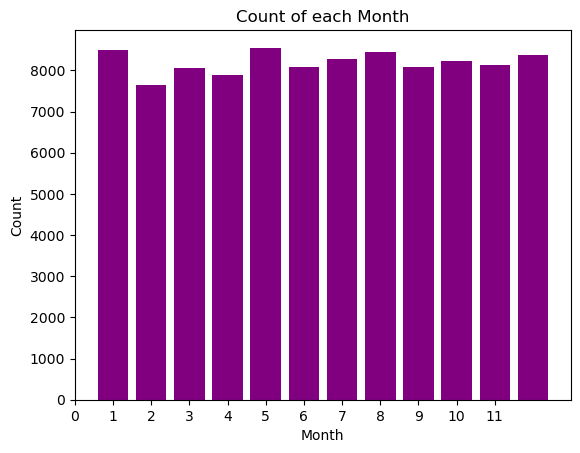

In [40]:
plt.bar(month_counts.index, month_counts.values , color='purple')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of each Month')
plt.xticks(np.arange(len(month_counts.index)))
plt.show()

### May Has the most Traffic With content activity 

In [41]:
SB['Hour']=SB['datetime'].dt.hour


## Which Hour is Known to have more traffic?

In [42]:
Hour_counts=SB['Hour'].value_counts()

In [43]:
Hour_counts

Hour
6     4348
9     4300
23    4288
8     4240
7     4176
16    4176
5     4152
0     4116
11    4104
3     4096
20    4096
15    4084
22    4084
21    4076
1     4068
18    4052
13    4052
4     4044
19    4040
14    4004
10    4004
17    3952
2     3900
12    3840
Name: count, dtype: int64

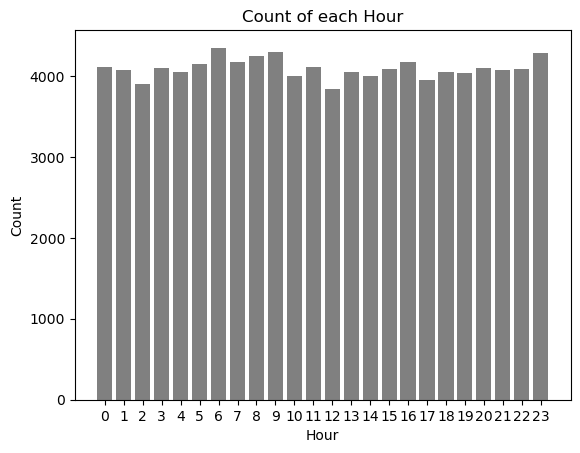

In [44]:
plt.bar(Hour_counts.index, Hour_counts.values , color='grey')

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Count of each Hour')
plt.xticks(np.arange(len(Hour_counts.index)))

plt.show()

### Most users View Content at 6am

## Most Popular Type of content Among Users?

In [45]:
Content_counts=SB['content_type'].value_counts()
Content_counts

content_type
Photo    26356
Video    24980
GIF      24316
Audio    22640
Name: count, dtype: int64

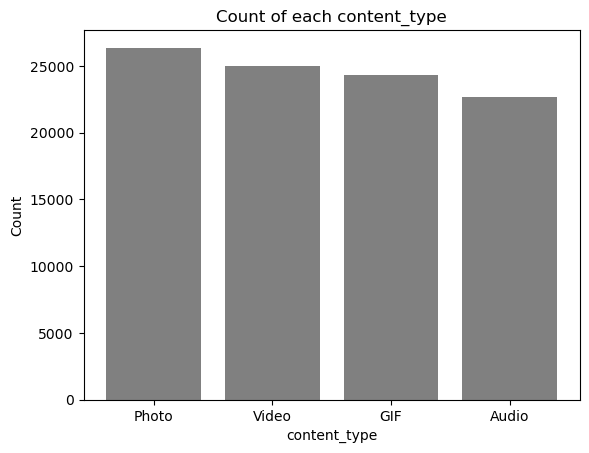

In [46]:
plt.bar(Content_counts.index, Content_counts.values , color='grey')

plt.xlabel('content_type')
plt.ylabel('Count')
plt.title('Count of each content_type')
plt.xticks(np.arange(len(Content_counts.index)))

plt.show()

### Photos Gain more traction on Social Buzz

## Content Sentiment in relation to content Type

In [47]:
sentiment_counts = SB.groupby(['content_type', 'sentiment']).size().unstack(fill_value=0)
print(sentiment_counts)

sentiment     Negative  Neutral  Positive
content_type                             
Audio             7084     2692     12864
GIF               7696     3096     13524
Photo             8228     3328     14800
Video             7772     3168     14040


### Photos Get the most views and  positive reactionsfollowed by videos then Gif's then Audios


In [48]:
SB

content_id content_type  category  \
0      4e4c9690-c013-4ee7-9e66-943d8cbd27b7          GIF   Culture   
1      4e4c9690-c013-4ee7-9e66-943d8cbd27b7          GIF   Culture   
2      435007a5-6261-4d8b-b0a4-55fdc189754b        Audio  Veganism   
3      435007a5-6261-4d8b-b0a4-55fdc189754b        Audio  Veganism   
4      435007a5-6261-4d8b-b0a4-55fdc189754b        Audio  Veganism   
...                                     ...          ...       ...   
98287  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98288  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98289  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98290  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98291  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   

      reaction_type            datetime sentiment  score  month  Hour  
0             Heart 2021-02-25 11:06:11  Positive     60      2    11  
1             Heart 2021-02-25 11:06:11  Positive     60      2    11  
2             Heart 2021-05-12 21:26:24  Positive     60      5    21  
3             Heart 2021-05-12 21:26:24  Positive     60      5    21  
4             Heart 2020-07-06 09:26:17  Positive     60      7     9  
...             ...                 ...       ...    ...    ...   ...  
98287       Worried 2021-05-10 09:27:42  Negative     12      5     9  
98288       Worried 2021-03-02 19:21:19  Negative     12      3    19  
98289       Worried 2021-03-02 19:21:19  Negative     12      3    19  
98290       Worried 2021-04-11 20:47:13  Negative     12      4    20  
98291       Worried 2021-04-11 20:47:13  Negative     12      4    20  

[98292 rows x 9 columns]

In [106]:
SocialBuzzData=SB.to_csv("SocialBuzzData.csv")

In [49]:
animal_reactions = SB[SB['category'] == 'Animals']
animal_reaction_counts = animal_reactions['reaction_type'].value_counts()
print(animal_reaction_counts)

reaction_type
Scared         528
Peeking        516
Hate           512
Cherish        500
Super Love     492
Want           488
Disgust        488
Worried        484
Heart          480
Love           476
Intrigued      464
Dislike        460
Adore          456
Interested     440
Like           404
Indifferent    400
Name: count, dtype: int64


In [50]:
animal_reaction_counts.sum()

7588

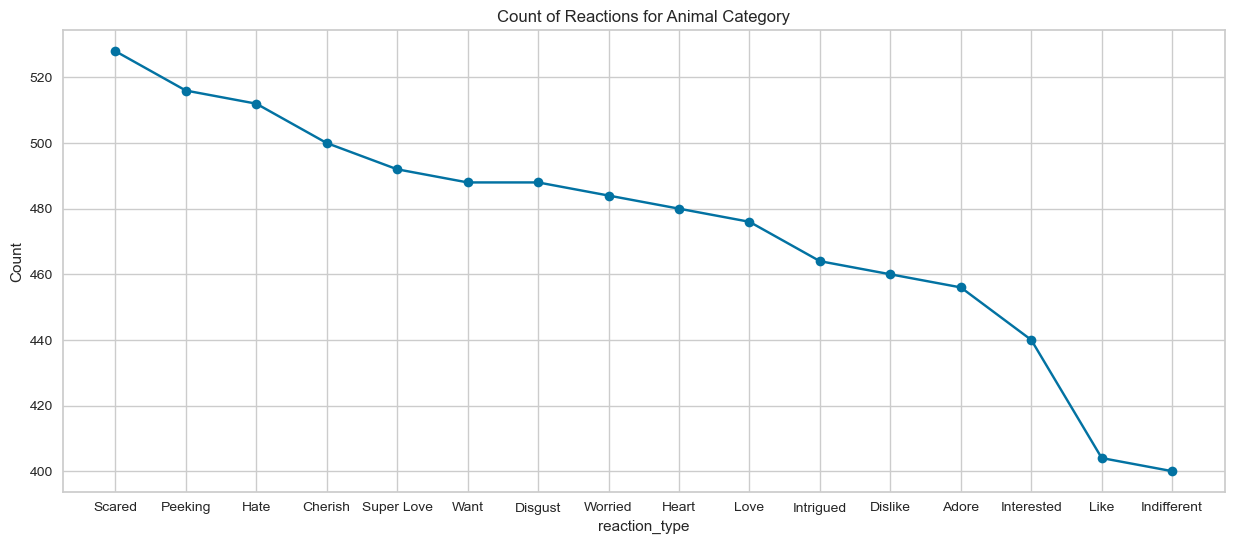

In [105]:

plt.figure(figsize=(15, 6))
plt.plot(animal_reaction_counts.index, animal_reaction_counts.values, marker='o', linestyle='-')
plt.xlabel('reaction_type')
plt.ylabel('Count')
plt.title('Count of Reactions for Animal Category')



plt.show()

## Feature Engineering

In [52]:
SB

content_id content_type  category  \
0      4e4c9690-c013-4ee7-9e66-943d8cbd27b7          GIF   Culture   
1      4e4c9690-c013-4ee7-9e66-943d8cbd27b7          GIF   Culture   
2      435007a5-6261-4d8b-b0a4-55fdc189754b        Audio  Veganism   
3      435007a5-6261-4d8b-b0a4-55fdc189754b        Audio  Veganism   
4      435007a5-6261-4d8b-b0a4-55fdc189754b        Audio  Veganism   
...                                     ...          ...       ...   
98287  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98288  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98289  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98290  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98291  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   

      reaction_type            datetime sentiment  score  month  Hour  
0             Heart 2021-02-25 11:06:11  Positive     60      2    11  
1             Heart 2021-02-25 11:06:11  Positive     60      2    11  
2             Heart 2021-05-12 21:26:24  Positive     60      5    21  
3             Heart 2021-05-12 21:26:24  Positive     60      5    21  
4             Heart 2020-07-06 09:26:17  Positive     60      7     9  
...             ...                 ...       ...    ...    ...   ...  
98287       Worried 2021-05-10 09:27:42  Negative     12      5     9  
98288       Worried 2021-03-02 19:21:19  Negative     12      3    19  
98289       Worried 2021-03-02 19:21:19  Negative     12      3    19  
98290       Worried 2021-04-11 20:47:13  Negative     12      4    20  
98291       Worried 2021-04-11 20:47:13  Negative     12      4    20  

[98292 rows x 9 columns]

In [53]:
sentiment_mapping = {'Neutral': 0, 'Positive': 1, 'Negative': -1}
SB['sentiment_score'] = SB['sentiment'].map(sentiment_mapping)

In [54]:
SB.tail()

content_id content_type  category  \
98287  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98288  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98289  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98290  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98291  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   

      reaction_type            datetime sentiment  score  month  Hour  \
98287       Worried 2021-05-10 09:27:42  Negative     12      5     9   
98288       Worried 2021-03-02 19:21:19  Negative     12      3    19   
98289       Worried 2021-03-02 19:21:19  Negative     12      3    19   
98290       Worried 2021-04-11 20:47:13  Negative     12      4    20   
98291       Worried 2021-04-11 20:47:13  Negative     12      4    20   

       sentiment_score  
98287               -1  
98288               -1  
98289               -1  
98290               -1  
98291               -1

## Sentiment Ratio

In [55]:
SB['sentiment_score'].value_counts()

sentiment_score
 1    55228
-1    30780
 0    12284
Name: count, dtype: int64

In [56]:
import plotly.graph_objects as go

plot_data=[
    go.Pie(
        labels=("Negative", "Neutral","Positve"),
        values=SB['sentiment_score'].value_counts(),
        marker=dict(colors=["Red","Blue","Green"],
                      line=dict(color="white",
                                width=1.5)),
        
        rotation=90,
        hoverinfo= 'label+value+text',
        hole=.6)
]   

plot_layout = go.Layout(dict(title='Sentiment Ratio'))
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()

In [57]:
sentiment_mapping = {'Neutral': -1, 'Positive': 1, 'Negative': 0}
SB['sentiment_score'] = SB['sentiment'].map(sentiment_mapping)

In [58]:
SB=SB.drop(SB[SB['sentiment_score'] == -1].index)                 

In [59]:
import plotly.graph_objects as go

plot_data=[
    go.Pie(
        labels=("Negative","Positve"),
        values=SB['sentiment_score'].value_counts(),
        marker=dict(colors=["Red","Green"],
                      line=dict(color="white",
                                width=1.5)),
        
        rotation=90,
        hoverinfo= 'label+value+text',
        hole=.6)
]   


plot_layout = go.Layout(dict(title='Sentiment Ratio'))

fig = go.Figure(data=plot_data, layout=plot_layout)


fig.show()


In [60]:
SB['content_type']=SB['content_type'].replace([True, False],[1,0])

## Further Data Cleaning

In [61]:
SB.dropna()

content_id content_type  category  \
0      4e4c9690-c013-4ee7-9e66-943d8cbd27b7          GIF   Culture   
1      4e4c9690-c013-4ee7-9e66-943d8cbd27b7          GIF   Culture   
2      435007a5-6261-4d8b-b0a4-55fdc189754b        Audio  Veganism   
3      435007a5-6261-4d8b-b0a4-55fdc189754b        Audio  Veganism   
4      435007a5-6261-4d8b-b0a4-55fdc189754b        Audio  Veganism   
...                                     ...          ...       ...   
98287  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98288  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98289  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98290  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98291  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   

      reaction_type            datetime sentiment  score  month  Hour  \
0             Heart 2021-02-25 11:06:11  Positive     60      2    11   
1             Heart 2021-02-25 11:06:11  Positive     60      2    11   
2             Heart 2021-05-12 21:26:24  Positive     60      5    21   
3             Heart 2021-05-12 21:26:24  Positive     60      5    21   
4             Heart 2020-07-06 09:26:17  Positive     60      7     9   
...             ...                 ...       ...    ...    ...   ...   
98287       Worried 2021-05-10 09:27:42  Negative     12      5     9   
98288       Worried 2021-03-02 19:21:19  Negative     12      3    19   
98289       Worried 2021-03-02 19:21:19  Negative     12      3    19   
98290       Worried 2021-04-11 20:47:13  Negative     12      4    20   
98291       Worried 2021-04-11 20:47:13  Negative     12      4    20   

       sentiment_score  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
98287                0  
98288                0  
98289                0  
98290                0  
98291                0  

[86008 rows x 10 columns]

In [62]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()
ohe.fit_transform(SB[['content_type','category','reaction_type','score',]]).toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [63]:
feature_arry=ohe.fit_transform(SB[['content_type','category','reaction_type']]).toarray()
ohe.categories_

[array(['Audio', 'GIF', 'Photo', 'Video'], dtype=object),
 array(['Animals', 'Cooking', 'Culture', 'Dogs', 'Education', 'Fitness',
        'Food', 'Healthy Eating', 'Healthy eating', 'Public Speaking',
        'Science', 'Soccer', 'Studying', 'Technology', 'Tennis', 'Travel',
        'Veganism'], dtype=object),
 array(['Adore', 'Cherish', 'Disgust', 'Dislike', 'Hate', 'Heart',
        'Interested', 'Intrigued', 'Like', 'Love', 'Scared', 'Super Love',
        'Want', 'Worried'], dtype=object)]

In [64]:
feature_df = pd.DataFrame(feature_arry, columns=ohe.get_feature_names_out(['content_type','category','reaction_type']))
feature_df

content_type_Audio  content_type_GIF  content_type_Photo  \
0                     0.0               1.0                 0.0   
1                     0.0               1.0                 0.0   
2                     1.0               0.0                 0.0   
3                     1.0               0.0                 0.0   
4                     1.0               0.0                 0.0   
...                   ...               ...                 ...   
86003                 0.0               0.0                 1.0   
86004                 0.0               0.0                 1.0   
86005                 0.0               0.0                 1.0   
86006                 0.0               0.0                 1.0   
86007                 0.0               0.0                 1.0   

       content_type_Video  category_Animals  category_Cooking  \
0                     0.0               0.0               0.0   
1                     0.0               0.0               0.0   
2                     0.0               0.0               0.0   
3                     0.0               0.0               0.0   
4                     0.0               0.0               0.0   
...                   ...               ...               ...   
86003                 0.0               0.0               0.0   
86004                 0.0               0.0               0.0   
86005                 0.0               0.0               0.0   
86006                 0.0               0.0               0.0   
86007                 0.0               0.0               0.0   

       category_Culture  category_Dogs  category_Education  category_Fitness  \
0                   1.0            0.0                 0.0               0.0   
1                   1.0            0.0                 0.0               0.0   
2                   0.0            0.0                 0.0               0.0   
3                   0.0            0.0                 0.0               0.0   
4                   0.0            0.0                 0.0               0.0   
...                 ...            ...                 ...               ...   
86003               0.0            0.0                 0.0               0.0   
86004               0.0            0.0                 0.0               0.0   
86005               0.0            0.0                 0.0               0.0   
86006               0.0            0.0                 0.0               0.0   
86007               0.0            0.0                 0.0               0.0   

       ...  reaction_type_Hate  reaction_type_Heart  reaction_type_Interested  \
0      ...                 0.0                  1.0                       0.0   
1      ...                 0.0                  1.0                       0.0   
2      ...                 0.0                  1.0                       0.0   
3      ...                 0.0                  1.0                       0.0   
4      ...                 0.0                  1.0                       0.0   
...    ...                 ...                  ...                       ...   
86003  ...                 0.0                  0.0                       0.0   
86004  ...                 0.0                  0.0                       0.0   
86005  ...                 0.0                  0.0                       0.0   
86006  ...                 0.0                  0.0                       0.0   
86007  ...                 0.0                  0.0                       0.0   

       reaction_type_Intrigued  reaction_type_Like  reaction_type_Love  \
0                          0.0                 0.0                 0.0   
1                          0.0                 0.0                 0.0   
2                          0.0                 0.0                 0.0   
3                          0.0                 0.0                 0.0   
4                          0.0                 0.0                 0.0   
...                        ...             

In [65]:
SBM= pd.concat([SB, feature_df], axis=1)
SBM

content_id content_type  category  \
0      4e4c9690-c013-4ee7-9e66-943d8cbd27b7          GIF   Culture   
1      4e4c9690-c013-4ee7-9e66-943d8cbd27b7          GIF   Culture   
2      435007a5-6261-4d8b-b0a4-55fdc189754b        Audio  Veganism   
3      435007a5-6261-4d8b-b0a4-55fdc189754b        Audio  Veganism   
4      435007a5-6261-4d8b-b0a4-55fdc189754b        Audio  Veganism   
...                                     ...          ...       ...   
86003                                   NaN          NaN       NaN   
86004                                   NaN          NaN       NaN   
86005                                   NaN          NaN       NaN   
86006                                   NaN          NaN       NaN   
86007                                   NaN          NaN       NaN   

      reaction_type            datetime sentiment  score  month  Hour  \
0             Heart 2021-02-25 11:06:11  Positive   60.0    2.0  11.0   
1             Heart 2021-02-25 11:06:11  Positive   60.0    2.0  11.0   
2             Heart 2021-05-12 21:26:24  Positive   60.0    5.0  21.0   
3             Heart 2021-05-12 21:26:24  Positive   60.0    5.0  21.0   
4             Heart 2020-07-06 09:26:17  Positive   60.0    7.0   9.0   
...             ...                 ...       ...    ...    ...   ...   
86003           NaN                 NaT       NaN    NaN    NaN   NaN   
86004           NaN                 NaT       NaN    NaN    NaN   NaN   
86005           NaN                 NaT       NaN    NaN    NaN   NaN   
86006           NaN                 NaT       NaN    NaN    NaN   NaN   
86007           NaN                 NaT       NaN    NaN    NaN   NaN   

       sentiment_score  ...  reaction_type_Hate  reaction_type_Heart  \
0                  1.0  ...                 0.0                  1.0   
1                  1.0  ...                 0.0                  1.0   
2                  1.0  ...                 0.0                  1.0   
3                  1.0  ...                 0.0                  1.0   
4                  1.0  ...                 0.0                  1.0   
...                ...  ...                 ...                  ...   
86003              NaN  ...                 0.0                  0.0   
86004              NaN  ...                 0.0                  0.0   
86005              NaN  ...                 0.0                  0.0   
86006              NaN  ...                 0.0                  0.0   
86007              NaN  ...                 0.0                  0.0   

       reaction_type_Interested  reaction_type_Intrigued  reaction_type_Like  \
0                           0.0                      0.0                 0.0   
1                           0.0                      0.0                 0.0   
2                           0.0                      0.0                 0.0   
3                           0.0                      0.0                 0.0   
4                           0.0                      0.0                 0.0   
...                         ...                      ...                 ...   
86003                       0.0                      0.0                 0.0   
86004                       0.0                      0.0                 0.0   
86005                       0.0                      0.0                 0.0   
86006                       0.0                      0.0                 0.0   
86007                       0.0                      0.0                 0.0   

       reaction_type_Love  reaction_type_Scared  reaction_type_Super Love  \
0                     0.0                   0.0                       0.0   
1                     0.0                   0.0                       0.0   
2                     0.0                   0.0                       0.0   
3                     0.0                   0.0                       0.0   
4                     0.0                   0.0                       0.0   
...                   ...  

In [66]:
SBM=SBM.drop(columns=['content_type','category','reaction_type','sentiment','datetime'])
SBM

content_id  score  month  Hour  \
0      4e4c9690-c013-4ee7-9e66-943d8cbd27b7   60.0    2.0  11.0   
1      4e4c9690-c013-4ee7-9e66-943d8cbd27b7   60.0    2.0  11.0   
2      435007a5-6261-4d8b-b0a4-55fdc189754b   60.0    5.0  21.0   
3      435007a5-6261-4d8b-b0a4-55fdc189754b   60.0    5.0  21.0   
4      435007a5-6261-4d8b-b0a4-55fdc189754b   60.0    7.0   9.0   
...                                     ...    ...    ...   ...   
86003                                   NaN    NaN    NaN   NaN   
86004                                   NaN    NaN    NaN   NaN   
86005                                   NaN    NaN    NaN   NaN   
86006                                   NaN    NaN    NaN   NaN   
86007                                   NaN    NaN    NaN   NaN   

       sentiment_score  content_type_Audio  content_type_GIF  \
0                  1.0                 0.0               1.0   
1                  1.0                 0.0               1.0   
2                  1.0                 1.0               0.0   
3                  1.0                 1.0               0.0   
4                  1.0                 1.0               0.0   
...                ...                 ...               ...   
86003              NaN                 0.0               0.0   
86004              NaN                 0.0               0.0   
86005              NaN                 0.0               0.0   
86006              NaN                 0.0               0.0   
86007              NaN                 0.0               0.0   

       content_type_Photo  content_type_Video  category_Animals  ...  \
0                     0.0                 0.0               0.0  ...   
1                     0.0                 0.0               0.0  ...   
2                     0.0                 0.0               0.0  ...   
3                     0.0                 0.0               0.0  ...   
4                     0.0                 0.0               0.0  ...   
...                   ...                 ...               ...  ...   
86003                 1.0                 0.0               0.0  ...   
86004                 1.0                 0.0               0.0  ...   
86005                 1.0                 0.0               0.0  ...   
86006                 1.0                 0.0               0.0  ...   
86007                 1.0                 0.0               0.0  ...   

       reaction_type_Hate  reaction_type_Heart  reaction_type_Interested  \
0                     0.0                  1.0                       0.0   
1                     0.0                  1.0                       0.0   
2                     0.0                  1.0                       0.0   
3                     0.0                  1.0                       0.0   
4                     0.0                  1.0                       0.0   
...                   ...                  ...                       ...   
86003                 0.0                  0.0                       0.0   
86004                 0.0                  0.0                       0.0   
86005                 0.0                  0.0                       0.0   
86006                 0.0                  0.0                       0.0   
86007                 0.0                  0.0                       0.0   

       reaction_type_Intrigued  reaction_type_Like  reaction_type_Love  \
0                          0.0                 0.0                 0.0   
1                          0.0                 0.0                 0.0   
2                          0.0                 0.0                 0.0   
3                          0.0                 0.0                 0.0   
4                          0.0                 0.0                 0.0   
...                        ...                 ...                 ...   
86003                      0.0                 0.0                 0.0   
86004                      0.0                 0.0                 0.0   
86005          

## Fixing Skewness In Data

In [67]:
SBM.describe()

score         month          Hour  sentiment_score  \
count  86008.000000  86008.000000  86008.000000     86008.000000   
mean      41.337550      6.522789     11.498977         0.642126   
std       27.267521      3.456571      6.926214         0.479377   
min        0.000000      1.000000      0.000000         0.000000   
25%       12.000000      4.000000      6.000000         0.000000   
50%       50.000000      7.000000     11.000000         1.000000   
75%       70.000000     10.000000     18.000000         1.000000   
max       75.000000     12.000000     23.000000         1.000000   

       content_type_Audio  content_type_GIF  content_type_Photo  \
count        86008.000000      86008.000000        86008.000000   
mean             0.231932          0.246721            0.267743   
std              0.422068          0.431106            0.442785   
min              0.000000          0.000000            0.000000   
25%              0.000000          0.000000            0.000000   
50%              0.000000          0.000000            0.000000   
75%              0.000000          0.000000            1.000000   
max              1.000000          1.000000            1.000000   

       content_type_Video  category_Animals  category_Cooking  ...  \
count        86008.000000      86008.000000      86008.000000  ...   
mean             0.253604          0.077574          0.068924  ...   
std              0.435076          0.267502          0.253326  ...   
min              0.000000          0.000000          0.000000  ...   
25%              0.000000          0.000000          0.000000  ...   
50%              0.000000          0.000000          0.000000  ...   
75%              1.000000          0.000000          0.000000  ...   
max              1.000000          1.000000          1.000000  ...   

       reaction_type_Hate  reaction_type_Heart  reaction_type_Interested  \
count        86008.000000         86008.000000              86008.000000   
mean             0.072179             0.075435                  0.072040   
std              0.258786             0.264093                  0.258555   
min              0.000000             0.000000                  0.000000   
25%              0.000000             0.000000                  0.000000   
50%              0.000000             0.000000                  0.000000   
75%              0.000000             0.000000                  0.000000   
max              1.000000             1.000000                  1.000000   

       reaction_type_Intrigued  reaction_type_Like  reaction_type_Love  \
count             86008.000000        86008.000000        86008.000000   
mean                  0.068598            0.070691            0.071342   
std                   0.252771            0.256310            0.257397   
min                   0.000000            0.000000            0.000000   
25%                   0.000000            0.000000            0.000000   
50%                   0.000000            0.000000            0.000000   
75%                   0.000000            0.000000            0.000000   
max                   1.000000            1.000000            1.000000   

       reaction_type_Scared  reaction_type_Super Love  reaction_type_Want  \
count          86008.000000              86008.000000        86008.000000   
mean               0.073109                  0.070645            0.071575   
std                0.260318                  0.256232            0.257784   
min                0.000000                  0.000000            0.000000   
25%                0.000000                  0.000000            0.000000   
50%                0.000000                  0.000000            0.000000   
75%                0.000000                  0.000000            0.000000   
max                1.000000                  1.000000            1.000000   

       reaction_type_Worried  
count           86008.000000  
mean                0.069621  
std                 0.25450

In [68]:
parameters_with_std_gt_1 = SBM.describe().loc['std'] > 1


print("Parameters with standard deviation greater than 1:")
print(parameters_with_std_gt_1[parameters_with_std_gt_1].index.tolist())

Parameters with standard deviation greater than 1:
['score', 'month', 'Hour']


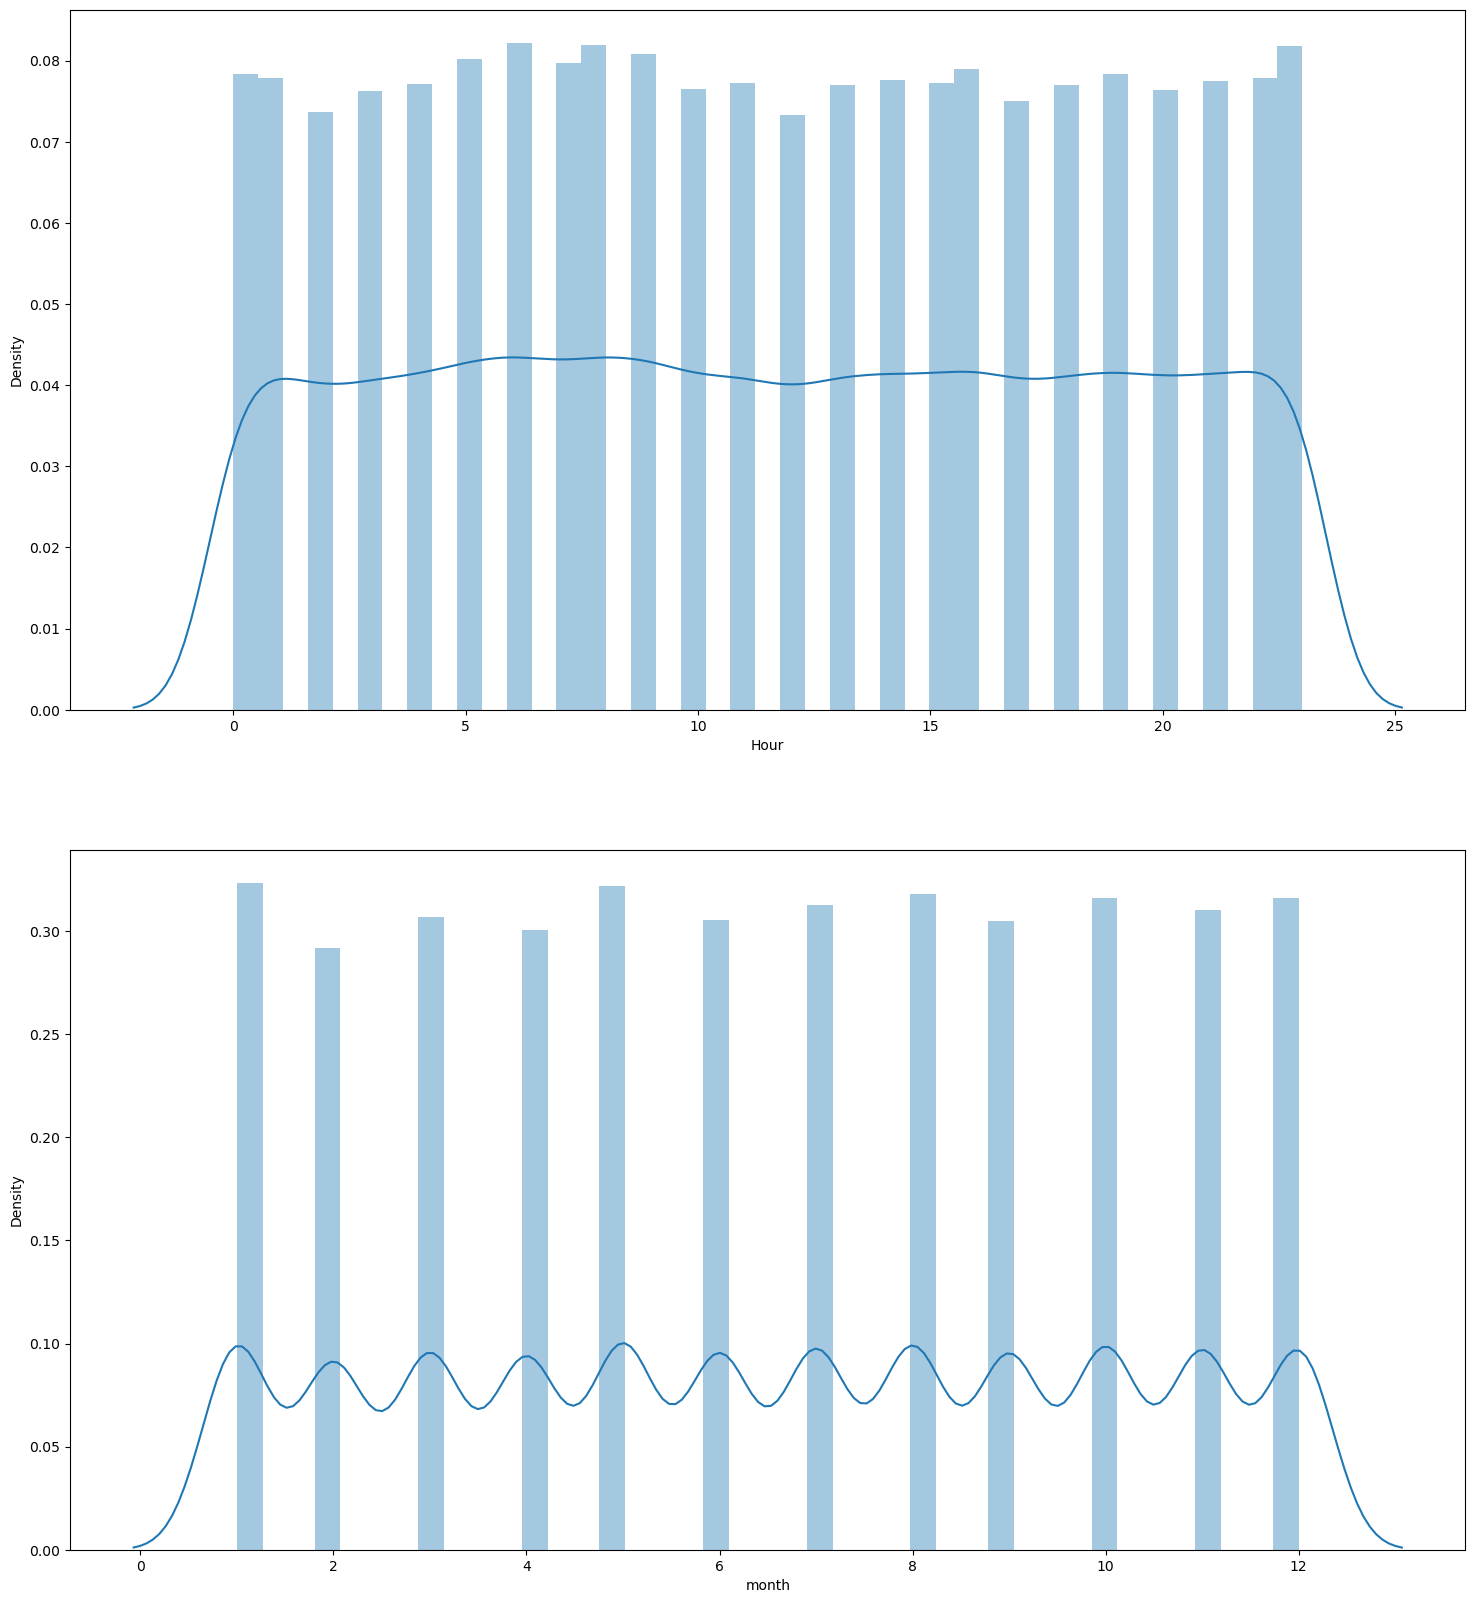

In [69]:
fig, axs = plt.subplots(nrows=2, figsize=(18, 20))

sns.distplot((SBM["Hour"].dropna()), ax=axs[0]) 
sns.distplot((SBM["month"].dropna()), ax=axs[1])
plt.show()

In [70]:
SBM["Hour"] = np.log10(SBM["Hour"] + 1) 
SBM["month"] = np.log10(SBM["month"]+ 1)

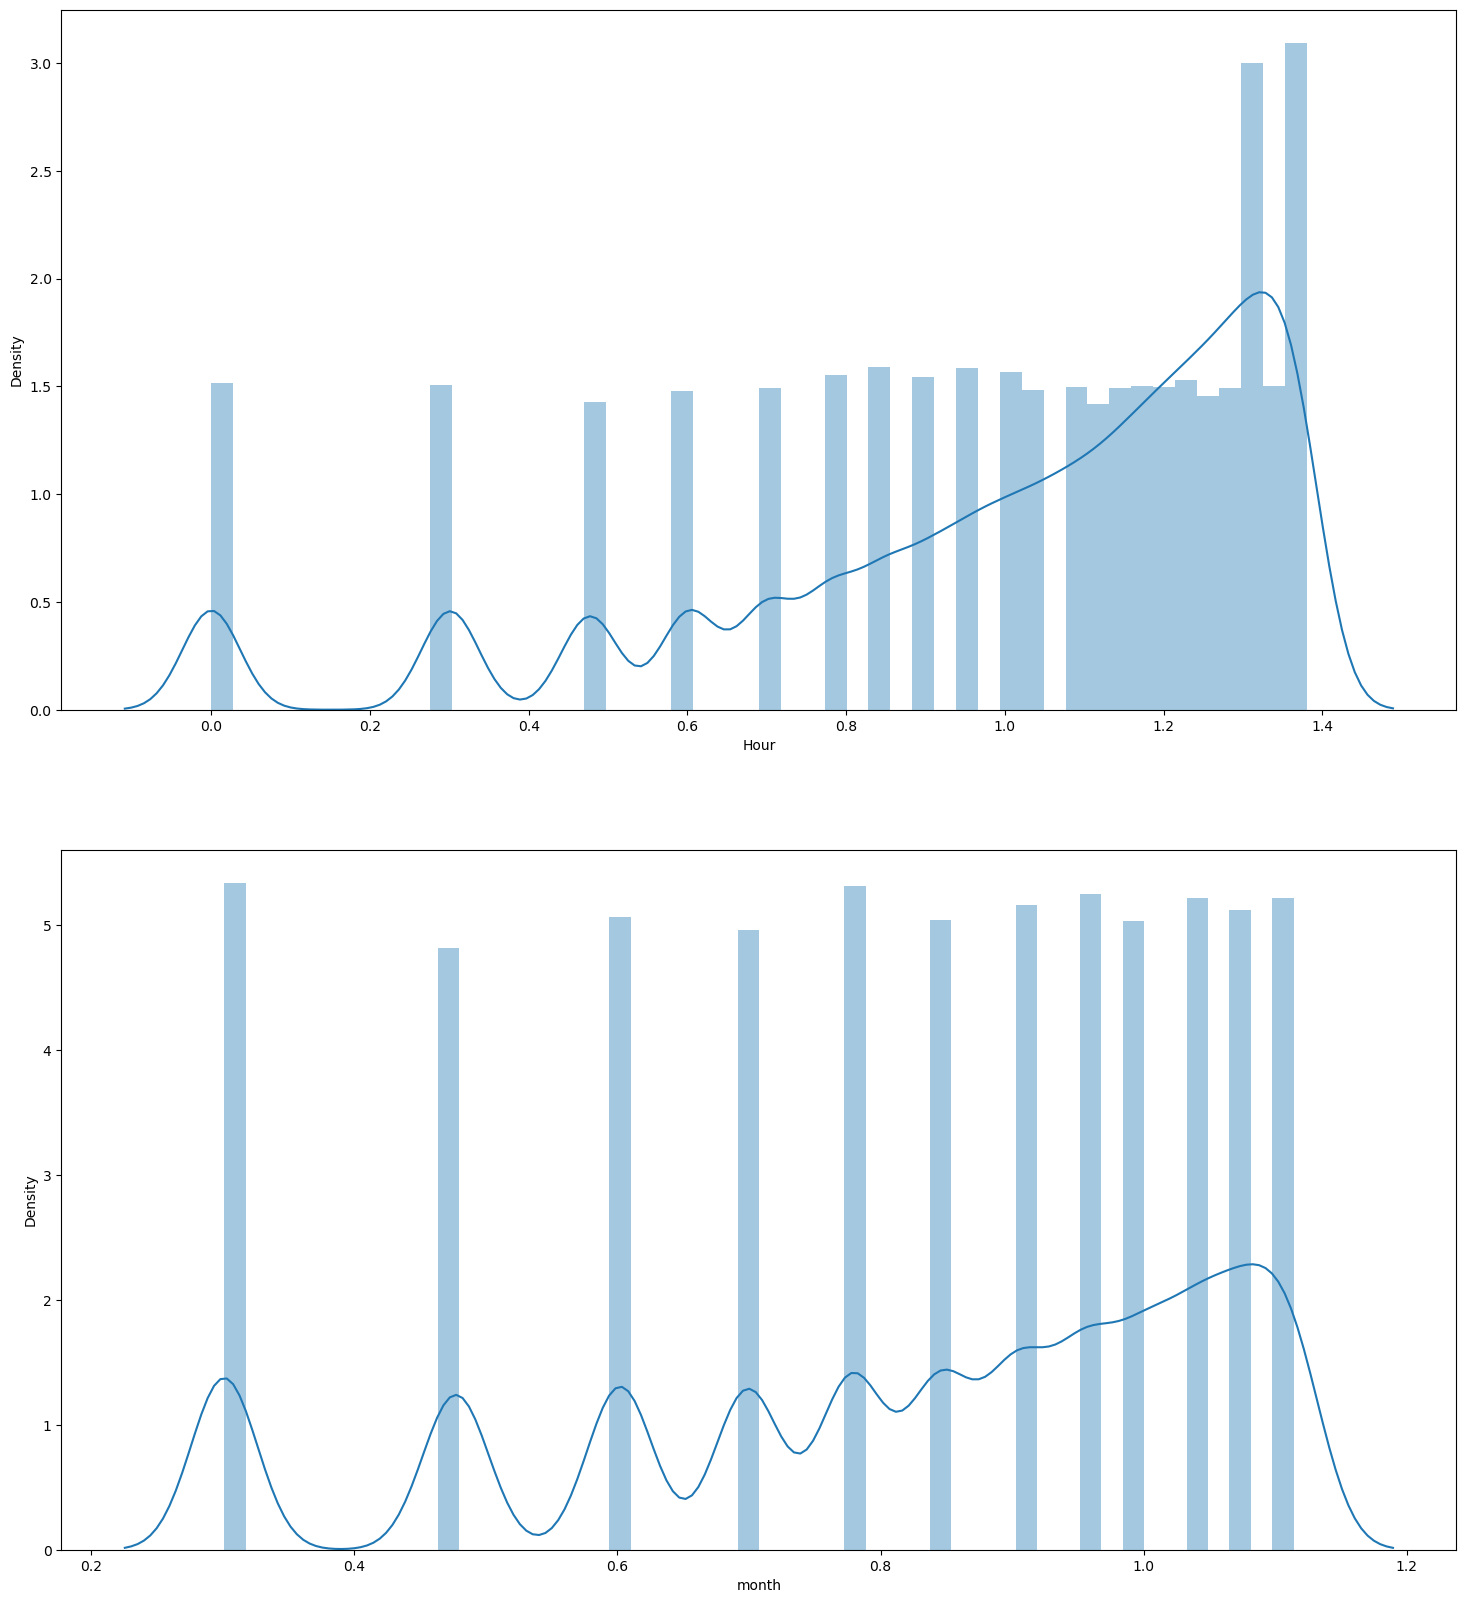

In [71]:
fig, axs = plt.subplots(nrows=2, figsize=(18, 20))

sns.distplot((SBM["Hour"].dropna()), ax=axs[0]) 
sns.distplot((SBM["month"].dropna()), ax=axs[1])
plt.show()

In [72]:
##SB=SB.drop(columns=['content_id'])

In [73]:
##SB.describe()

Text(0.5, 1.0, 'Hour vs Sentiment')

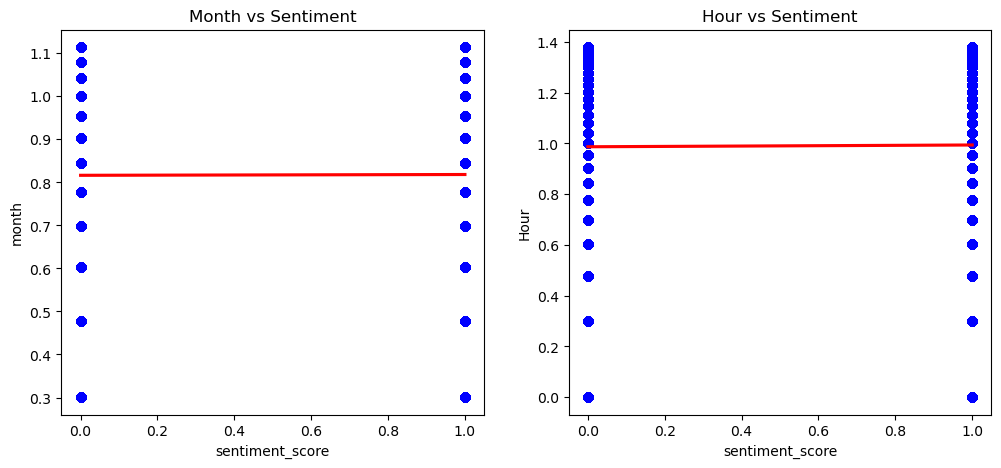

In [74]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.regplot(y='month', x='sentiment_score', data=SBM,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=axs[0])
axs[0].set_title('Month vs Sentiment')


sns.regplot(y='Hour', x='sentiment_score', data=SBM,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=axs[1])
axs[1].set_title('Hour vs Sentiment')

In [75]:
SBM.columns

Index(['content_id', 'score', 'month', 'Hour', 'sentiment_score',
       'content_type_Audio', 'content_type_GIF', 'content_type_Photo',
       'content_type_Video', 'category_Animals', 'category_Cooking',
       'category_Culture', 'category_Dogs', 'category_Education',
       'category_Fitness', 'category_Food', 'category_Healthy Eating',
       'category_Healthy eating', 'category_Public Speaking',
       'category_Science', 'category_Soccer', 'category_Studying',
       'category_Technology', 'category_Tennis', 'category_Travel',
       'category_Veganism', 'reaction_type_Adore', 'reaction_type_Cherish',
       'reaction_type_Disgust', 'reaction_type_Dislike', 'reaction_type_Hate',
       'reaction_type_Heart', 'reaction_type_Interested',
       'reaction_type_Intrigued', 'reaction_type_Like', 'reaction_type_Love',
       'reaction_type_Scared', 'reaction_type_Super Love',
       'reaction_type_Want', 'reaction_type_Worried'],
      dtype='object')

In [76]:
SBM=SBM.dropna()

In [77]:
SBM

content_id  score     month      Hour  \
0      4e4c9690-c013-4ee7-9e66-943d8cbd27b7   60.0  0.477121  1.079181   
1      4e4c9690-c013-4ee7-9e66-943d8cbd27b7   60.0  0.477121  1.079181   
2      435007a5-6261-4d8b-b0a4-55fdc189754b   60.0  0.778151  1.342423   
3      435007a5-6261-4d8b-b0a4-55fdc189754b   60.0  0.778151  1.342423   
4      435007a5-6261-4d8b-b0a4-55fdc189754b   60.0  0.903090  1.000000   
...                                     ...    ...       ...       ...   
79775  9f737e0a-3cdd-4d29-9d24-753f4e3be810   45.0  1.000000  0.000000   
79776  97522e57-d9ab-4bd6-97bf-c24d952602d2   45.0  0.954243  0.954243   
79777  97522e57-d9ab-4bd6-97bf-c24d952602d2   45.0  0.954243  0.954243   
79778  97522e57-d9ab-4bd6-97bf-c24d952602d2   45.0  0.301030  1.230449   
79779  97522e57-d9ab-4bd6-97bf-c24d952602d2   45.0  0.301030  1.230449   

       sentiment_score  content_type_Audio  content_type_GIF  \
0                  1.0                 0.0               1.0   
1                  1.0                 0.0               1.0   
2                  1.0                 1.0               0.0   
3                  1.0                 1.0               0.0   
4                  1.0                 1.0               0.0   
...                ...                 ...               ...   
79775              1.0                 1.0               0.0   
79776              1.0                 1.0               0.0   
79777              1.0                 1.0               0.0   
79778              1.0                 1.0               0.0   
79779              1.0                 1.0               0.0   

       content_type_Photo  content_type_Video  category_Animals  ...  \
0                     0.0                 0.0               0.0  ...   
1                     0.0                 0.0               0.0  ...   
2                     0.0                 0.0               0.0  ...   
3                     0.0                 0.0               0.0  ...   
4                     0.0                 0.0               0.0  ...   
...                   ...                 ...               ...  ...   
79775                 0.0                 0.0               0.0  ...   
79776                 0.0                 0.0               0.0  ...   
79777                 0.0                 0.0               0.0  ...   
79778                 0.0                 0.0               0.0  ...   
79779                 0.0                 0.0               0.0  ...   

       reaction_type_Hate  reaction_type_Heart  reaction_type_Interested  \
0                     0.0                  1.0                       0.0   
1                     0.0                  1.0                       0.0   
2                     0.0                  1.0                       0.0   
3                     0.0                  1.0                       0.0   
4                     0.0                  1.0                       0.0   
...                   ...                  ...                       ...   
79775                 0.0                  0.0                       0.0   
79776                 0.0                  0.0                       0.0   
79777                 0.0                  0.0                       0.0   
79778                 0.0                  0.0                       0.0   
79779                 0.0                  0.0                       0.0   

       reaction_type_Intrigued  reaction_type_Like  reaction_type_Love  \
0                          0.0                 0.0                 0.0   
1                          0.0                 0.0                 0.0   
2                          0.0                 0.0                 0.0   
3                          0.0                 0.0                 0.0   
4                          0.0                 0.0                 0.0   
...                        ...                 ...                 ...   
79775                      0.0                 0.0                 0.0   
79776

## Model Building

In [78]:
from sklearn.model_selection import train_test_split
X =SBM.drop(columns= ['sentiment_score','content_id'], axis=1)
Y=SBM['sentiment_score']
X_train, X_tests, Y_train, Y_tests = train_test_split(X, Y, test_size=0.3, random_state=42)
print('Test set:', X_train.shape, Y_train.shape)
print('Test set:', X_tests.shape, Y_tests.shape)

Test set: (51612, 38) (51612,)
Test set: (22120, 38) (22120,)


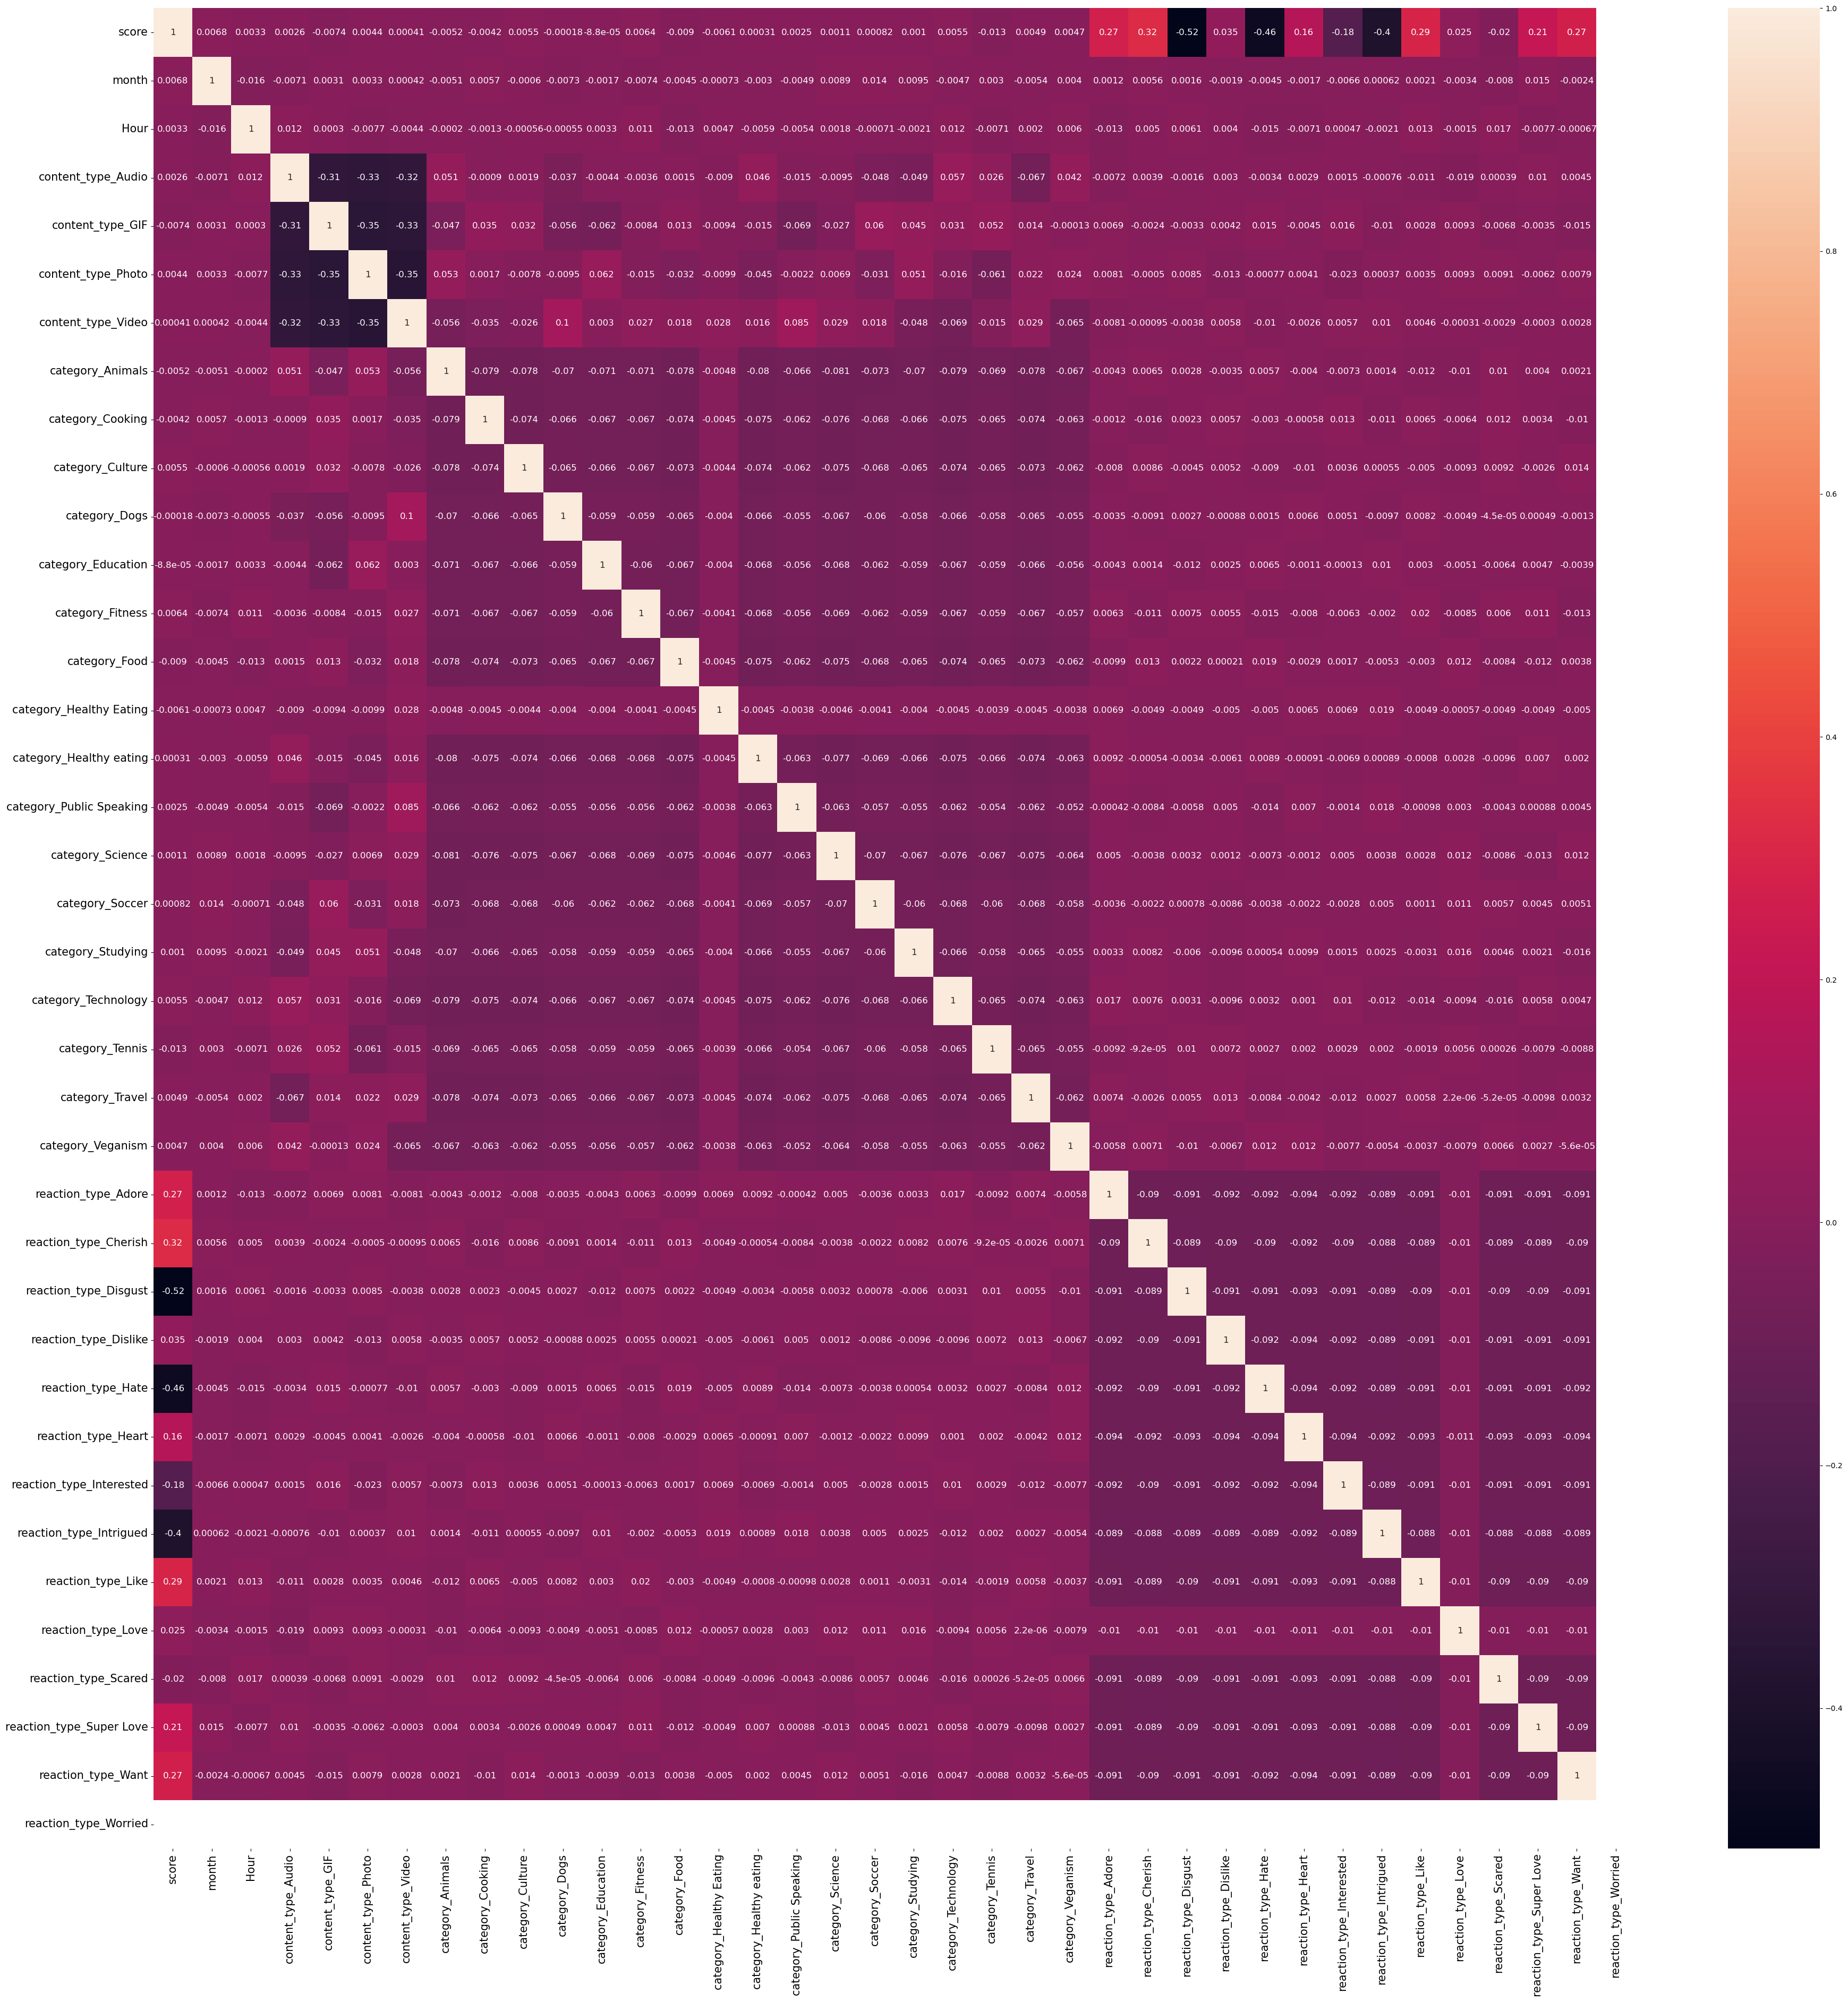

In [79]:
correlation = SBM.drop(columns= ['sentiment_score','content_id'], axis=1).corr()
plt.figure(figsize=(45, 45))
sns.heatmap(correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, annot=True,
annot_kws={'size': 12})

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [80]:
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_tests.shape,  Y_tests.shape) 

Train set: (51612, 38) (51612,)
Test set: (22120, 38) (22120,)


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [82]:
def model_fit_predict(model, X, Y, X_predict):
    model.fit(X,Y)
    return model.predict(X_predict)
def acc_score(Y_true, Y_pred):
    return accuracy_score(Y_true, Y_pred)
def pre_score(Y_true,Y_pred):
    return precision_score(Y_true, Y_pred)
def f_score(Y_true, Y_pred):
    return f1_score(Y_true, Y_pred)

In [83]:
model1 = RandomForestClassifier()

Y_pred_test = model_fit_predict(model1, X_train, Y_train, X_tests)


f1 = round(f1_score(Y_tests, Y_pred_test),2) 

acc = round(accuracy_score(Y_tests, Y_pred_test),2) 

pre = round(precision_score(Y_tests, Y_pred_test,) ,2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 1.0, 1.0 and 1.0 respectively


In [84]:
from sklearn import metrics
predictions1 = model1.predict(X_tests)
tn, fp, fn, tp = metrics.confusion_matrix(Y_tests, predictions1).ravel()
Y_tests.value_counts()


print(f"True positives: {tp}") 
print(f"False positives: {fp}") 
print(f"True negatives: {tn}") 
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(Y_tests, predictions1)}") 
print(f"Precision: {metrics.precision_score(Y_tests, predictions1)}") 
print(f"Recall: {metrics.recall_score(Y_tests, predictions1)}")

True positives: 16599
False positives: 0
True negatives: 5521
False negatives: 0

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


1.0

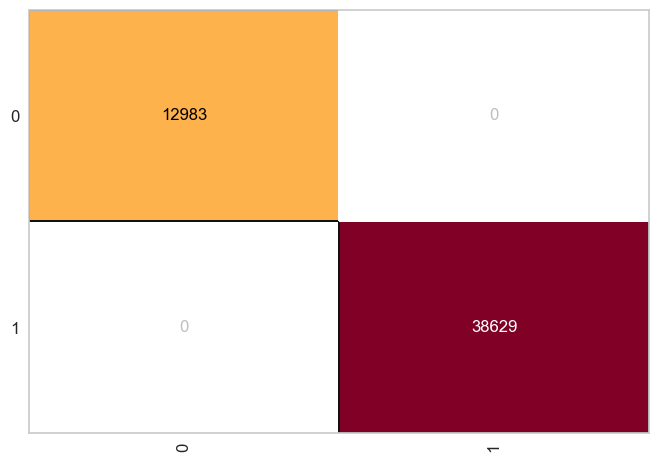

In [85]:
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
cm1= ConfusionMatrix(model1, classes=[0,1])
cm1.fit(X_train, Y_train)

cm1.score(X_train, Y_train)

In [86]:
feature_importances = pd.DataFrame({'features': X_train.columns,'importance': model1.feature_importances_}).sort_values(by='importance', ascending=True).reset_index()

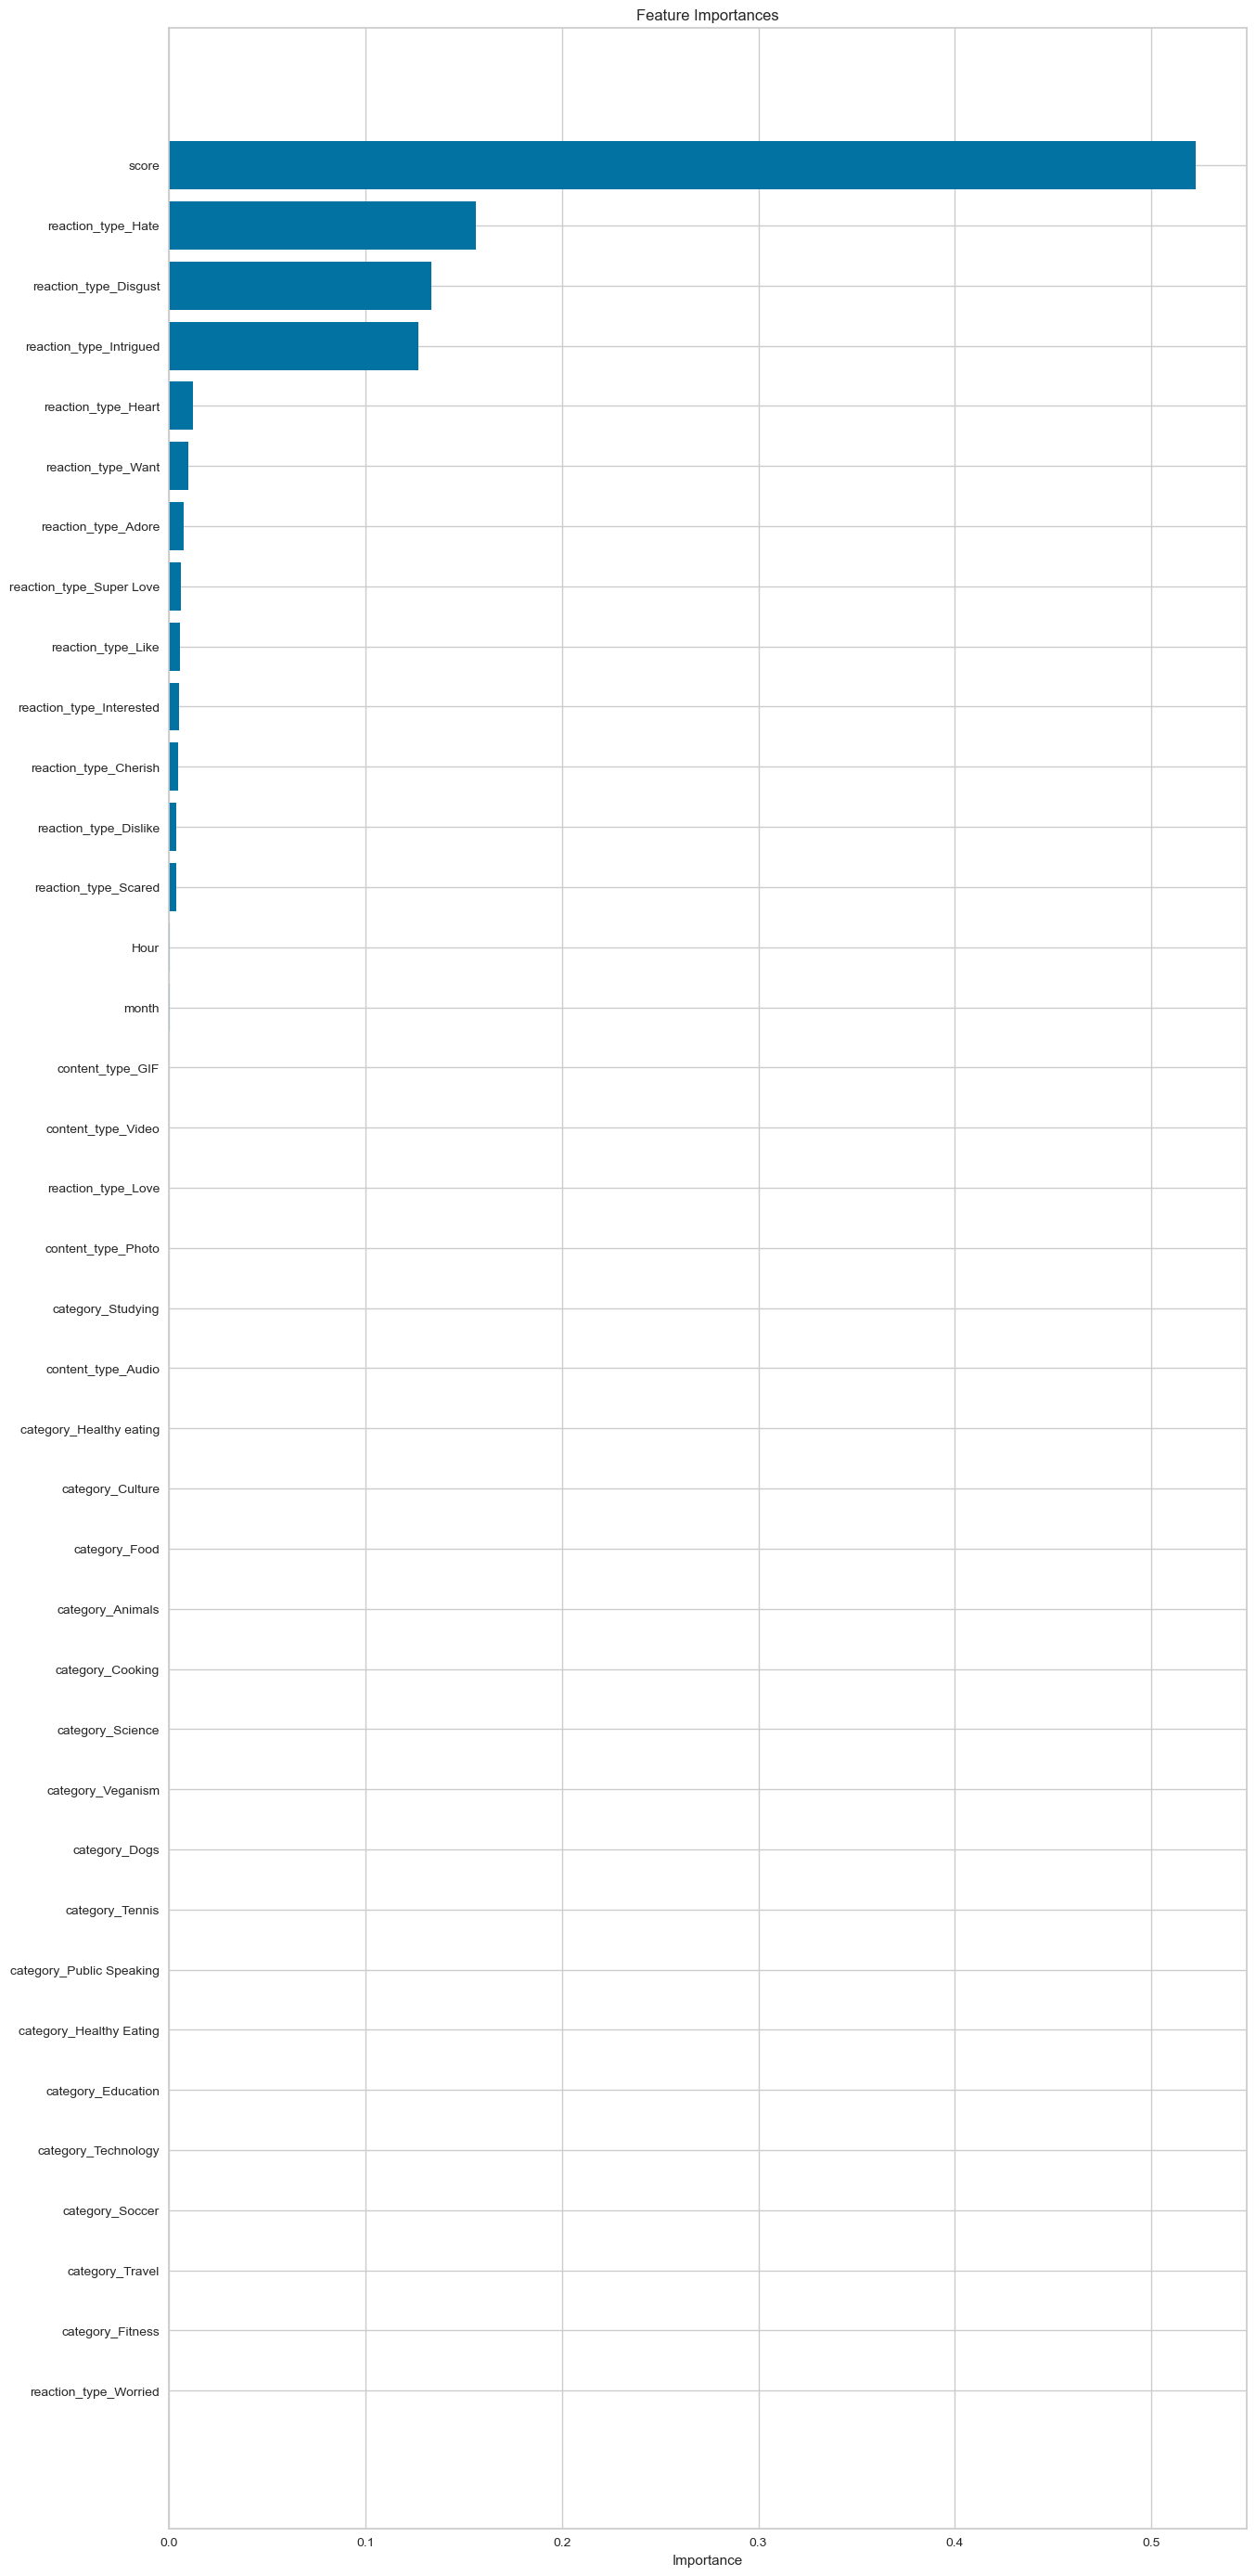

In [87]:
plt.figure(figsize=(15, 35))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'],color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features']) 
plt.xlabel('Importance')
plt.show()

In [88]:
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len (corr_matrix.columns)) :
        for j in range(i):
            if abs (corr_matrix.iloc [i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns [i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [89]:
corr_features=correlation(X_train, 0.7)
len(set(corr_features))

0

### No features are highly correlated

In [90]:
predictions = model1.predict(X_tests)
tn, fp, fn, tp = metrics.confusion_matrix(Y_tests, predictions).ravel()
Y_tests.value_counts()

sentiment_score
1.0    16599
0.0     5521
Name: count, dtype: int64

In [91]:
proba_predictions = model1.predict_proba(X_tests)
probabilities = proba_predictions[:,1]

In [92]:
X_tests['sentiment_score'] = predictions.tolist()
X_tests['Sentiment_probability'] = probabilities.tolist()
X_tests.to_csv('sampled_data_with_predictions.csv')

In [93]:
SD=pd.read_csv("sampled_data_with_predictions.csv")

In [94]:
SD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22120 entries, 0 to 22119
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                22120 non-null  int64  
 1   score                     22120 non-null  float64
 2   month                     22120 non-null  float64
 3   Hour                      22120 non-null  float64
 4   content_type_Audio        22120 non-null  float64
 5   content_type_GIF          22120 non-null  float64
 6   content_type_Photo        22120 non-null  float64
 7   content_type_Video        22120 non-null  float64
 8   category_Animals          22120 non-null  float64
 9   category_Cooking          22120 non-null  float64
 10  category_Culture          22120 non-null  float64
 11  category_Dogs             22120 non-null  float64
 12  category_Education        22120 non-null  float64
 13  category_Fitness          22120 non-null  float64
 14  catego

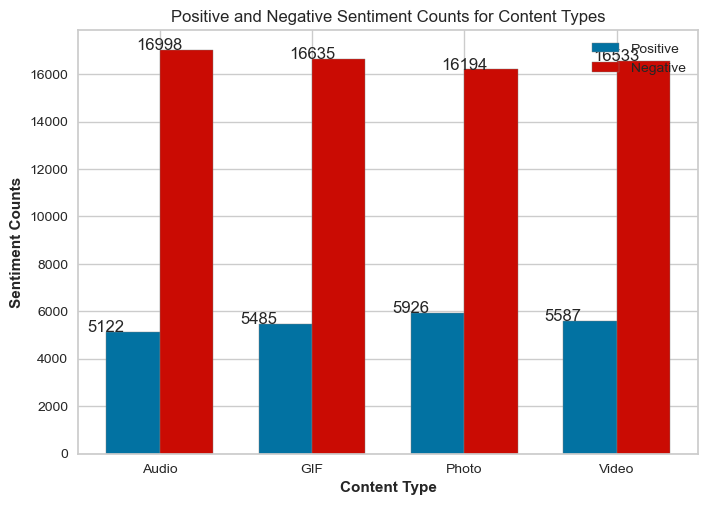

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Count positive and negative sentiments for each column
audio_positives = SD[SD['content_type_Audio'] == 1]['sentiment_score'].count()
audio_negatives = SD[SD['content_type_Audio'] == 0]['sentiment_score'].count()

gif_positives = SD[SD['content_type_GIF'] == 1]['sentiment_score'].count()
gif_negatives = SD[SD['content_type_GIF'] == 0]['sentiment_score'].count()

photo_positives = SD[SD['content_type_Photo'] == 1]['sentiment_score'].count()
photo_negatives = SD[SD['content_type_Photo'] == 0]['sentiment_score'].count()

video_positives = SD[SD['content_type_Video'] == 1]['sentiment_score'].count()
video_negatives = SD[SD['content_type_Video'] == 0]['sentiment_score'].count()

# Define the columns and their corresponding positive and negative counts
columns = ['Audio', 'GIF', 'Photo', 'Video']
positives = [audio_positives, gif_positives, photo_positives, video_positives]
negatives = [audio_negatives, gif_negatives, photo_negatives, video_negatives]

# Define the width of the bars
bar_width = 0.35

# Set the positions for the bars
r1 = np.arange(len(columns))
r2 = [x + bar_width for x in r1]

# Create the grouped bar chart
plt.bar(r1, positives, color='b', width=bar_width, edgecolor='grey', label='Positive')
plt.bar(r2, negatives, color='r', width=bar_width, edgecolor='grey', label='Negative')

# Add counts to the bars
for i in range(len(r1)):
    plt.text(x=r1[i] - bar_width/2, y=positives[i] + 5, s=str(positives[i]), ha='center')
    plt.text(x=r2[i] - bar_width/2, y=negatives[i] + 5, s=str(negatives[i]), ha='center')

# Add labels and title
plt.xlabel('Content Type', fontweight='bold')
plt.ylabel('Sentiment Counts', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(columns))], columns)
plt.title('Positive and Negative Sentiment Counts for Content Types')
plt.legend()

# Show plot
plt.show()


In [96]:
SB.count

<bound method DataFrame.count of                                  content_id content_type  category  \
0      4e4c9690-c013-4ee7-9e66-943d8cbd27b7          GIF   Culture   
1      4e4c9690-c013-4ee7-9e66-943d8cbd27b7          GIF   Culture   
2      435007a5-6261-4d8b-b0a4-55fdc189754b        Audio  Veganism   
3      435007a5-6261-4d8b-b0a4-55fdc189754b        Audio  Veganism   
4      435007a5-6261-4d8b-b0a4-55fdc189754b        Audio  Veganism   
...                                     ...          ...       ...   
98287  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98288  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98289  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98290  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   
98291  97522e57-d9ab-4bd6-97bf-c24d952602d2        Photo  Studying   

      reaction_type            datetime sentiment  score  month  Hour  \
0             Heart 2021-02-25 11:06:11  Positive    